# Árvores de Decisão

***

## Índice

1. [Importando bibliotecas](#Importando-bibliotecas)
2. [Classificação e regressão](#Classificação-e-regressão)
3. [Critérios de escolha](#Critérios-de-escolha)

## Importando bibliotecas

In [2]:
# Bibliotecas de manipualção e visualização de dados
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

# Classes dos modelo
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree

# Funções de avaliação dos modelos
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# Função para carregar nosso dataset
from sklearn.datasets import load_wine

Criando funções auxiliares

In [3]:
def show_decision_region(x, y, clf, f0, f1):
    plot_decision_regions(x, y, clf=clf)
    plt.xlabel(f0)
    plt.ylabel(f1)
    if clf.__class__.__name__ == "KNeighborsClassifier":
        plt.title(clf.__class__.__name__ + " k = " + str(clf.n_neighbors))
    else:
        plt.title(clf.__class__.__name__)
    plt.show()

## Classificação e regressão

Árvores de decisão são modelos importantes pela sua capacidade de explicar de forma simples os padrões dentro do dataset. Podemos olhar para uma árvore de decisão como uma sequência de _ifs_ aninhados. Vamos entender como a árvore de decisão representa nosso dataset de classificação.

In [4]:
# carregar dataset
X, y = load_wine(return_X_y=True, as_frame=True)

# definição de classes e features
class_a = 0
class_b = 1
feature_0 = "alcohol"
feature_1 = "color_intensity"

# filtrar classes e features
class_0_instances = (y == class_a)
class_1_instances = (y == class_b)

filtered_y = y[class_0_instances | class_1_instances]
filtered_X = X[class_0_instances | class_1_instances]
filtered_X = filtered_X[[feature_0, feature_1]]

# dividir classificador em treino e teste
X_train, X_test, y_train, y_test = train_test_split(filtered_X, filtered_y, test_size=0.3, random_state=199)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=199)

In [5]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [6]:
# qual o resultado para esse classificador?
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.91      0.71      0.80        14
           1       0.86      0.96      0.91        25

    accuracy                           0.87        39
   macro avg       0.88      0.84      0.85        39
weighted avg       0.88      0.87      0.87        39



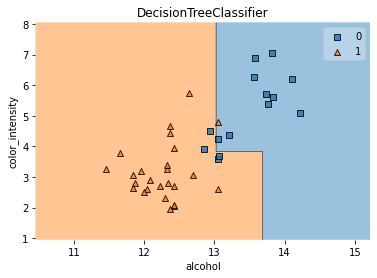

In [7]:
show_decision_region(
    np.array(
        [
            X_test[feature_0].values, 
            X_test[feature_1].values,
        ]
    ).T, 
    y_test.values, 
    model, 
    feature_0, 
    feature_1
)

[Text(200.88000000000002, 428.08500000000004, 'alcohol <= 13.02\ngini = 0.5\nsamples = 63\nvalue = [32, 31]'),
 Text(100.44000000000001, 305.775, 'gini = 0.0\nsamples = 29\nvalue = [0, 29]'),
 Text(301.32000000000005, 305.775, 'color_intensity <= 3.82\ngini = 0.111\nsamples = 34\nvalue = [32, 2]'),
 Text(200.88000000000002, 183.46500000000003, 'alcohol <= 13.69\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(100.44000000000001, 61.15499999999997, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(301.32000000000005, 61.15499999999997, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(401.76000000000005, 183.46500000000003, 'gini = 0.0\nsamples = 31\nvalue = [31, 0]')]

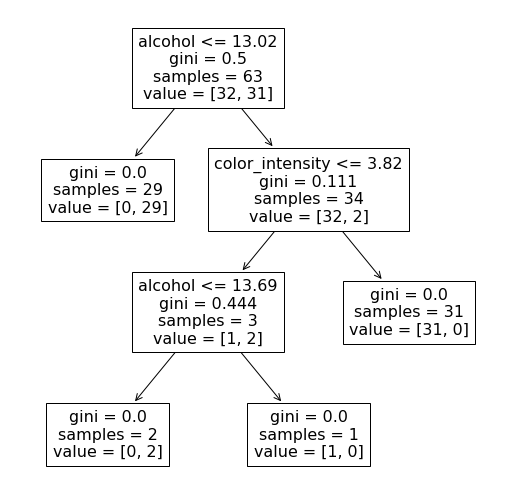

In [ ]:
plt.figure(figsize=(9,9))
plot_tree(model, feature_names=["alcohol", "color_intensity"])

Como a árvore de decisão funciona para um modelo de regressão? 

Vamos criar um dataset sinteticamente, usando uma função seno e fazer nossa árvore de decisão replicar esse seno.

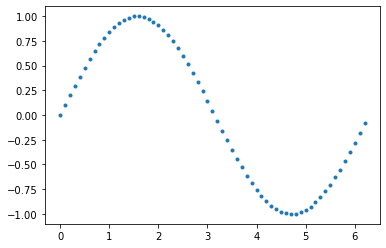

In [ ]:
# criando o eixo x
X = np.arange(0, 2*np.pi, 0.1)
# criando o eixo y
y = np.sin(X)

X = np.expand_dims(X, axis=1) # adequação para criar um dataset com apenas uma feature
plt.plot(X, y, ".")

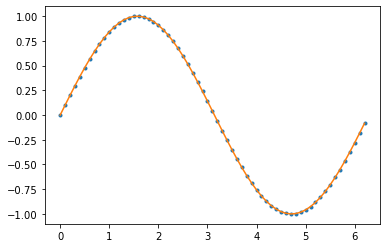

In [ ]:

# criando nosso classificador
model = DecisionTreeRegressor()

model.fit(X, y)
y_pred = model.predict(X)

plt.figure()
plt.plot(X, y, ".")
plt.plot(X, y_pred)


Aqui podemos perceber que a árvore de decisão consegue aproximar muito bem uma função como o seno. 

    - Qual o resultado se limitarmos a quantidade de divisões da árvore?
    - Qual é o resultado se introduzirmos um pouco de ruído?

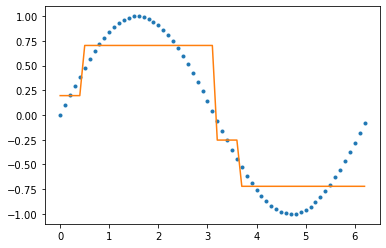

In [ ]:
# criando nosso classificador
model = DecisionTreeRegressor(max_depth=2)

model.fit(X, y)
y_pred = model.predict(X)

plt.figure()
plt.plot(X, y, ".")
plt.plot(X, y_pred)


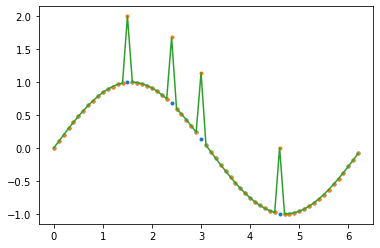

In [ ]:
# criando nosso classificador
model = DecisionTreeRegressor()
# vamos criar um valor do seno com ruído e observar como o nosso regressor resolve esse problema
np.random.seed(20)
# o ruído é criado da seguinte forma: o sinal pode sofrer interferência por um ruído escolhido entre
# [0.2, 0.4, 0.6, 0.8, 1.0] de forma uniforme, tendo chance de 50% de acontecer. A probabilidade da amostra
# ser rudiosa é controlada pelo segundo fator da multiplocação, onde uma distribuição uniforme escolhe
# um número inteiro entre 0 e 10, e caso esse número seja maior que cinco, o ruído acontece.
noise_values = (np.random.randint(0, 5, size=y.shape) / 5)
noise_probability = (np.random.randint(0, 10, size=y.shape) > 5)
noisy_y = y + (noise_values * noise_probability)

model.fit(X, noisy_y)
y_pred = model.predict(X)

plt.figure()
plt.plot(X, y, ".")
plt.plot(X, y_pred)
plt.plot(X, noisy_y, ".")


## Critérios de escolha

A árvore de decisão possui critérios diferentes de escolha de como será feita a próxima divisão, maximizando o ganho de informação. O ganho de informação é usado para determinar os melhores recursos / atributos que trazem o máximo de informações sobre uma classe. Diminuir o nível de entropia desde o nó raiz até as folhas.


Para classificação os métodos de escolha são:

- entropia: Entropia é o grau de incerteza, impureza ou desordem de uma variável aleatória ou uma medida de pureza. $entropy(p) = -\sum_{i=1}^np_ilog_2(p_i)$ 
    
- coeficiente gini: Mede a probabilidade de uma variável específica ser classificada erroneamente quando escolhida aleatoriamente. $gini(p) = 1-\sum_{i=1}^n (p_i)^2$


Para regressão:

- erro quadrático: minimza a função $L_2$

- erro absoluto: minimiza a função $L_1$
